<b>NOTES FOR THE VIEWER AS OF 3:47 AM NOV 26</b>

<blockquote> 
    
    1. Need to explore more features, possibly within csv file or from outside sources like gdp or 3rd world country tagging etc.
    2. 11.8K average MAE as of now
    3. Tried imputing values based on median or mode depending on dtype of feature
    4. Tried isolation forest as suggested by basti, not sure how to tune it tho, just used arbitrary params.
</blockquote> 

<b>NOTES FOR THE VIEWER AS OF 3:47 AM NOV 27</b>

<blockquote> 
    
    1. Need to explore more features, possibly within csv file or from outside sources like gdp or 3rd world country tagging etc.
    2. 8K average MAE as of now using GBM
</blockquote> 

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
import seaborn as sns
import tqdm
from sklearn.impute import SimpleImputer
%matplotlib inline

import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm_notebook
from collections import Counter

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import Lasso
import shap
import optuna
from sklearn.metrics import median_absolute_error
import re
import os

In [2]:
os.path.abspath('')
# os.path.isfile('survey_results_public.csv')

'C:\\Users\\JG\\jupyter directory\\AIM\\TERM3\\ML2\\group project\\stackoverflow_salary\\nov_26'

# Loading Data

In [3]:
df_raw = pd.read_csv('C:\\Users\\JG\\jupyter directory\\AIM\\TERM3\\ML2\\group project\\stackoverflow_salary\survey_results_public.csv')
df_raw

ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2             I am a student who is learning to code   
2               3  I am not primarily a developer, but I write co...   
3               4                     I am a developer by profession   
4               5                     I am a developer by profession   
...           ...                                                ...   
83434       83435                     I am a developer by profession   
83435       83436                     I am a developer by profession   
83436       83437                     I am a developer by profession   
83437       83438                     I am a developer by profession   
83438       83439                     I am a developer by profession   

                                              Employment  \
0      Independent contractor, freelancer, or self-em...   
1                                     Student, full-time   
2                                     Student, full-time   
3                                     Employed full-time   
4      Independent contractor, freelancer, or self-em...   
...                                                  ...   
83434                                 Employed full-time   
83435  Independent contractor, freelancer, or self-em...   
83436                                 Employed full-time   
83437                                 Employed full-time   
83438                                 Employed full-time   

                                                 Country    US_State  \
0                                               Slovakia         NaN   
1                                            Netherlands         NaN   
2                                     Russian Federation         NaN   
3                                                Austria         NaN   
4      United Kingdom of Great Britain and Northern I...         NaN   
...                                                  ...         ...   
83434                           United States of America       Texas   
83435                                              Benin         NaN   
83436                           United States of America  New Jersey   
83437                                             Canada         NaN   
83438                                             Brazil         NaN   

      UK_Country                                            EdLevel  \
0            NaN  Secondary school (e.g. American high school, G...   
1            NaN       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2            NaN       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3            NaN    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4        England    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...          ...                                                ...   
83434        NaN       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
83435        NaN       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
83436        NaN  Secondary school (e.g. American high school, G...   
83437        NaN       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
83438        NaN                 Professional degree (JD, MD, etc.)   

          Age1stCode                                          LearnCode  \
0      18 - 24 years  Coding Bootcamp;Other online resources (ex: vi...   
1      11 - 17 years  Other online resources (ex: videos, blogs, etc...   
2      11 - 17 years  Other online resources (ex: videos, blogs, etc...   
3      11 - 17 years                                                NaN   
4       5 - 10 years                            Friend or family member   
...              ...                                                ...   
83434  11 - 17 years  Other online resources (ex: videos, blogs, etc...   
83435  11 - 17 years  Other online resources (ex: videos, blogs, etc...   
83436  11 - 17 years        

In [4]:
df_raw.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

# Cleaning

## Dropping Unimportant Columns

In [5]:
cols_drop = ['US_State', 'UK_Country', 'Age1stCode', 'LearnCode', 'Currency', 
             'CompTotal', 'CompFreq', 'LanguageWantToWorkWith', 
             'DatabaseWantToWorkWith', 'PlatformWantToWorkWith', 'WebframeWantToWorkWith', 
             'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
             'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 
             'NEWCollabToolsWantToWorkWith', 'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 
             'SOAccount', 'SOComm', 'NEWOtherComms', 'Gender', 'Trans', 'Sexuality',
             'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
             'SurveyEase']
df_drop = df_raw.drop(columns=cols_drop, axis=0)
df_drop.head(3)

ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2             I am a student who is learning to code   
2           3  I am not primarily a developer, but I write co...   

                                          Employment             Country  \
0  Independent contractor, freelancer, or self-em...            Slovakia   
1                                 Student, full-time         Netherlands   
2                                 Student, full-time  Russian Federation   

                                             EdLevel YearsCode YearsCodePro  \
0  Secondary school (e.g. American high school, G...       NaN          NaN   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         7          NaN   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       NaN          NaN   

             DevType             OrgSize  \
0  Developer, mobile  20 to 99 employees   
1                NaN                 NaN   
2                NaN                 NaN   

                          LanguageHaveWorkedWith DatabaseHaveWorkedWith  \
0  C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift      PostgreSQL;SQLite   
1                              JavaScript;Python             PostgreSQL   
2                       Assembly;C;Python;R;Rust                 SQLite   

  PlatformHaveWorkedWith    OpSys                       SOPartFreq  \
0                    NaN    MacOS  A few times per month or weekly   
1                    NaN  Windows            Daily or almost daily   
2                 Heroku    MacOS           Multiple times per day   

               Age  ConvertedCompYearly  
0  25-34 years old              62268.0  
1  18-24 years old                  NaN  
2  18-24 years old                  NaN

In [6]:
df_drop.dtypes

ResponseId                  int64
MainBranch                 object
Employment                 object
Country                    object
EdLevel                    object
YearsCode                  object
YearsCodePro               object
DevType                    object
OrgSize                    object
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
OpSys                      object
SOPartFreq                 object
Age                        object
ConvertedCompYearly       float64
dtype: object

In [7]:
df_drop.isna().sum()

ResponseId                    0
MainBranch                    0
Employment                  116
Country                       0
EdLevel                     313
YearsCode                  1798
YearsCodePro              22223
DevType                   16955
OrgSize                   22713
LanguageHaveWorkedWith     1082
DatabaseHaveWorkedWith    13893
PlatformHaveWorkedWith    31304
OpSys                       145
SOPartFreq                15886
Age                        1032
ConvertedCompYearly       36595
dtype: int64

In [8]:
df_drop.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'EdLevel',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'OpSys', 'SOPartFreq', 'Age',
       'ConvertedCompYearly'],
      dtype='object')

In [9]:
df_drop = df_drop.dropna(subset=['ConvertedCompYearly', 'DevType', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith'])
display(df_drop.shape)
df_drop.isna().sum()

(30667, 16)

ResponseId                   0
MainBranch                   0
Employment                   0
Country                      0
EdLevel                     12
YearsCode                  227
YearsCodePro               271
DevType                      0
OrgSize                     28
LanguageHaveWorkedWith       0
DatabaseHaveWorkedWith       0
PlatformHaveWorkedWith       0
OpSys                        6
SOPartFreq                4491
Age                         73
ConvertedCompYearly          0
dtype: int64

# Imputing

In [10]:
# imputer_median = SimpleImputer()

def years_code_mapping(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 55
    elif x is np.nan:
        return x
    else:
        return int(x)
    
df_drop['YearsCode'] = df_drop['YearsCode'].apply(years_code_mapping)
df_drop['YearsCodePro'] = df_drop['YearsCodePro'].apply(years_code_mapping)

df_drop['YearsCode']  = df_drop['YearsCode'].replace(np.nan, df_drop['YearsCode'].median())
df_drop['YearsCodePro']  = df_drop['YearsCodePro'].replace(np.nan, df_drop['YearsCodePro'].median())

In [11]:
# def mode_imputer(x):
df_drop['EdLevel'] = df_drop['EdLevel'].copy().apply(lambda x: df_drop['EdLevel'].mode().values[0] if x is np.nan else x)
df_drop['Employment'] = df_drop['Employment'].copy().apply(lambda x: df_drop['Employment'].mode().values[0] if x is np.nan else x)
df_drop['OrgSize'] = df_drop['OrgSize'].copy().apply(lambda x: df_drop['OrgSize'].mode().values[0] if x is np.nan else x)
df_drop['SOPartFreq'] = df_drop['SOPartFreq'].copy().apply(lambda x: df_drop['SOPartFreq'].mode().values[0] if x is np.nan else x)
df_drop['Age'] = df_drop['Age'].copy().apply(lambda x: df_drop['Age'].mode().values[0] if x is np.nan else x)
df_drop['OpSys'] = df_drop['OpSys'].copy().apply(lambda x: df_drop['OpSys'].mode().values[0] if x is np.nan else x)


# df_drop[df_drop['EdLevel'].isna()]

In [12]:
df_drop['EdLevel'].mode().values[0]

'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'

In [13]:
df_drop.isna().sum()

ResponseId                0
MainBranch                0
Employment                0
Country                   0
EdLevel                   0
YearsCode                 0
YearsCodePro              0
DevType                   0
OrgSize                   0
LanguageHaveWorkedWith    0
DatabaseHaveWorkedWith    0
PlatformHaveWorkedWith    0
OpSys                     0
SOPartFreq                0
Age                       0
ConvertedCompYearly       0
dtype: int64

In [14]:
df_drop

ResponseId                      MainBranch          Employment  \
11             12  I am a developer by profession  Employed full-time   
16             17  I am a developer by profession  Employed full-time   
17             18  I am a developer by profession  Employed full-time   
24             25  I am a developer by profession  Employed full-time   
31             32  I am a developer by profession  Employed full-time   
...           ...                             ...                 ...   
83432       83433  I am a developer by profession  Employed full-time   
83434       83435  I am a developer by profession  Employed full-time   
83436       83437  I am a developer by profession  Employed full-time   
83437       83438  I am a developer by profession  Employed full-time   
83438       83439  I am a developer by profession  Employed full-time   

                        Country  \
11                        Spain   
16                       Turkey   
17                       Canada   
24                      Germany   
31                       Israel   
...                         ...   
83432                    Canada   
83434  United States of America   
83436  United States of America   
83437                    Canada   
83438                    Brazil   

                                                 EdLevel  YearsCode  \
11          Bachelor’s degree (B.A., B.S., B.Eng., etc.)       12.0   
16          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        6.0   
17          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        9.0   
24       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       26.0   
31          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        4.0   
...                                                  ...        ...   
83432       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        5.0   
83434       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        6.0   
83436  Secondary school (e.g. American high school, G...       10.0   
83437       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        5.0   
83438                 Professional degree (JD, MD, etc.)       14.0   

       YearsCodePro                                            DevType  \
11              5.0                                Developer, back-end   
16              2.0                              Developer, full-stack   
17              6.0  Developer, front-end;Developer, full-stack;Dev...   
24             18.0  Developer, front-end;Developer, desktop or ent...   
31              2.0                 Engineer, data;Developer, back-end   
...             ...                                                ...   
83432           0.5                                Developer, back-end   
83434           5.0                                Developer, back-end   
83436           4.0  Data scientist or machine learning specialist;...   
83437           3.0                                Developer, back-end   
83438           4.0  Developer, front-end;Developer, full-stack;Dev...   

                        OrgSize  \
11           10 to 19 employees   
16         100 to 499 employees   
17         500 to 999 employees   
24     1,000 to 4,999 employees   
31     5,000 to 9,999 employees   
...                         ...   
83432  10,000 or more employees   
83434        20 to 99 employees   
83436  10,000 or more employees   
83437        20 to 99 employees   
83438              I don’t know   

                                  LanguageHaveWorkedWith  \
11     Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...   
16                   C#;HTML/CSS;Java;JavaScript;Node.js   
17           Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL   
24     C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...   
31           Bash/Shell;Go;Java;Node.js;Python;Scala;SQL   
...                                                  ...   
83432                                               Ruby   
83434                                 Clojure;Kotlin;SQL   
83436 

## Filtering Asian or Developing Countries

In [15]:

# df_drop.Country.unique()


# asian_countries = ['Russian Federation', 'India', 'Indonesia', 'Iran', 'Sri Lanka',
#                    'Georgia', 'Hong Kong (S.A.R.)', 'Japan', 'United Arab Emirates', 
#                    'Turkey', 'Pakistan', 'Lebanon', 'Malaysia', 'China', 'Jordan', 'Uzbekistan', 
#                    'Syrian Arab Republic', 'Taiwan', 'South Korea', 'Viet Nam', 
#                    "Lao People's Democratic Republic", 'Nepal', 'Philippines', 'Azerbaijan', 
#                    'Saudi Arabia', 'Singapore', 'Armenia', 'Cyprus', 'Kuwait', 'Thailand', 
#                    'Myanmar', 'Kazakhstan', 'Iraq', 'Bahrain', 'Cambodia', 'Bhutan', 'Kyrgyzstan', 
#                    'Republic of Korea', 'Tajikistan', 'Oman', 'Palestine', 'Afghanistan', 'Mongolia', 'Maldives',
#                    'Qatar', 'Turkmenistan'
#                   ]

developing_countries = ['Russian Federation', 'India', 'Indonesia', 'Iran', 'Sri Lanka',
                   'Georgia', 
                   'Turkey', 'Pakistan', 'Lebanon', 'Malaysia', 'China', 'Jordan', 'Uzbekistan', 
                   'Syrian Arab Republic', 'Viet Nam', 
                   "Lao People's Democratic Republic", 'Nepal', 'Philippines', 'Azerbaijan', 
                   'Armenia', 'Thailand', 
                   'Myanmar', 'Kazakhstan', 'Iraq', 'Cambodia', 'Bhutan', 'Kyrgyzstan', 
                   'Tajikistan', 'Palestine', 'Afghanistan', 'Mongolia', 'Maldives',
                   'Turkmenistan'
                  ]


df_drop = df_drop[df_drop['Country'].isin(developing_countries)]
df_drop

ResponseId                                         MainBranch  \
16             17                     I am a developer by profession   
58             59  I am not primarily a developer, but I write co...   
148           149  I am not primarily a developer, but I write co...   
154           155                     I am a developer by profession   
168           169                     I am a developer by profession   
...           ...                                                ...   
83345       83346                     I am a developer by profession   
83348       83349                     I am a developer by profession   
83356       83357                     I am a developer by profession   
83411       83412                     I am a developer by profession   
83431       83432                     I am a developer by profession   

                                              Employment             Country  \
16                                    Employed full-time              Turkey   
58                                    Employed full-time  Russian Federation   
148    Independent contractor, freelancer, or self-em...           Sri Lanka   
154    Independent contractor, freelancer, or self-em...               India   
168    Independent contractor, freelancer, or self-em...             Georgia   
...                                                  ...                 ...   
83345                                 Employed full-time             Georgia   
83348  Independent contractor, freelancer, or self-em...         Philippines   
83356  Independent contractor, freelancer, or self-em...           Indonesia   
83411                                 Employed full-time               India   
83431  Independent contractor, freelancer, or self-em...            Pakistan   

                                                 EdLevel  YearsCode  \
16          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        6.0   
58                    Professional degree (JD, MD, etc.)        5.0   
148      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        2.0   
154         Bachelor’s degree (B.A., B.S., B.Eng., etc.)       20.0   
168    Some college/university study without earning ...        4.0   
...                                                  ...        ...   
83345  Some college/university study without earning ...        8.0   
83348  Some college/university study without earning ...        9.0   
83356       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       11.0   
83411       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        8.0   
83431       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        9.0   

       YearsCodePro                                            DevType  \
16              2.0                              Developer, full-stack   
58              3.0  Developer, full-stack;Data scientist or machin...   
148             2.0    Database administrator;Data or business analyst   
154             7.0  Developer, front-end;Developer, full-stack;Dev...   
168             2.0  Developer, front-end;Engineer, data;Developer,...   
...             ...                                                ...   
83345           4.0  Developer, front-end;Developer, full-stack;Dev...   
83348           9.0          Developer, full-stack;Developer, back-end   
83356           5.0  Developer, mobile;Developer, front-end;Develop...   
83411           5.0                                Developer, back-end   
83431           4.0  Developer, mobile;Developer, desktop or enterp...   

                                                 OrgSize  \
16                                  100 to 499 employees   
58                                    20 to 99 employees   
148    Just me - I am a freelancer, sole proprietor, ...   
154    Just me - I am a freelancer, sole proprietor, ...   
168    Just me - I am a freelancer, sole proprietor, ...   
...                                                  ...   
83345              

In [16]:
data_dev_list = ['Data scientist or machine learning specialist',
                 'Database administrator',
                 'Data or business analyst',
                 'Engineer, data']
ser_dev = df_drop['DevType'].str.split(';')
index_list = []
for idx, elem in ser_dev.iteritems():
    for item in elem:
        if item in data_dev_list:
            index_list.append(idx)
            break
df_devs = df_drop.loc[index_list,:]
df_devs

ResponseId                                         MainBranch  \
58             59  I am not primarily a developer, but I write co...   
148           149  I am not primarily a developer, but I write co...   
154           155                     I am a developer by profession   
168           169                     I am a developer by profession   
213           214                     I am a developer by profession   
...           ...                                                ...   
83046       83047  I am not primarily a developer, but I write co...   
83291       83292                     I am a developer by profession   
83294       83295                     I am a developer by profession   
83356       83357                     I am a developer by profession   
83431       83432                     I am a developer by profession   

                                              Employment             Country  \
58                                    Employed full-time  Russian Federation   
148    Independent contractor, freelancer, or self-em...           Sri Lanka   
154    Independent contractor, freelancer, or self-em...               India   
168    Independent contractor, freelancer, or self-em...             Georgia   
213                                   Employed full-time  Russian Federation   
...                                                  ...                 ...   
83046                                 Employed full-time               India   
83291                                 Employed full-time               India   
83294                                 Employed full-time  Russian Federation   
83356  Independent contractor, freelancer, or self-em...           Indonesia   
83431  Independent contractor, freelancer, or self-em...            Pakistan   

                                                 EdLevel  YearsCode  \
58                    Professional degree (JD, MD, etc.)        5.0   
148      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        2.0   
154         Bachelor’s degree (B.A., B.S., B.Eng., etc.)       20.0   
168    Some college/university study without earning ...        4.0   
213           Other doctoral degree (Ph.D., Ed.D., etc.)       15.0   
...                                                  ...        ...   
83046    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       14.0   
83291       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        5.0   
83294  Some college/university study without earning ...       15.0   
83356       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       11.0   
83431       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        9.0   

       YearsCodePro                                            DevType  \
58              3.0  Developer, full-stack;Data scientist or machin...   
148             2.0    Database administrator;Data or business analyst   
154             7.0  Developer, front-end;Developer, full-stack;Dev...   
168             2.0  Developer, front-end;Engineer, data;Developer,...   
213             9.0  Developer, mobile;Developer, full-stack;Data s...   
...             ...                                                ...   
83046          11.0  Developer, front-end;Developer, full-stack;Dev...   
83291           2.0  Engineer, data;Data or business analyst;Engine...   
83294          13.0  Developer, back-end;Database administrator;Dev...   
83356           5.0  Developer, mobile;Developer, front-end;Develop...   
83431           4.0  Developer, mobile;Developer, desktop or enterp...   

                                                 OrgSize  \
58                                    20 to 99 employees   
148    Just me - I am a freelancer, sole proprietor, ...   
154    Just me - I am a freelancer, sole proprietor, ...   
168    Just me - I am a freelancer, sole proprietor, ...   
213                             10,000 or more employees   
...                                                  ...   
83046              

## adding GDP per capita as a feature (nov 28)

**best MAE so far 8454** Nov 28 7:52pm

Source:
>https://worldpopulationreview.com/countries/countries-by-gdp

In [17]:
developing_countries

['Russian Federation',
 'India',
 'Indonesia',
 'Iran',
 'Sri Lanka',
 'Georgia',
 'Turkey',
 'Pakistan',
 'Lebanon',
 'Malaysia',
 'China',
 'Jordan',
 'Uzbekistan',
 'Syrian Arab Republic',
 'Viet Nam',
 "Lao People's Democratic Republic",
 'Nepal',
 'Philippines',
 'Azerbaijan',
 'Armenia',
 'Thailand',
 'Myanmar',
 'Kazakhstan',
 'Iraq',
 'Cambodia',
 'Bhutan',
 'Kyrgyzstan',
 'Tajikistan',
 'Palestine',
 'Afghanistan',
 'Mongolia',
 'Maldives',
 'Turkmenistan']

In [18]:
def gdp_mapping(x):
    if x == 'Russian Federation':
        return 11428
    elif x == 'India':
        return 2338
    elif x == 'Indonesia':
        return 4374
    elif x == 'Iran':
        return 5830
    elif x == 'Sri Lanka':
        return 4184
    elif x == 'Georgia':
        return 4746
    elif x == 'Turkey':
        return 9519
    elif x == 'Pakistan':
        return 1254
    elif x == 'Lebanon':
        return 8955
    elif x == 'Malaysia':
        return 12265
    elif x == 'China':
        return 10710
    elif x == 'Jordan':
        return 4374
    elif x == 'Uzbekistan':
        return 1635
    elif x == 'Syrian Arab Republic':
        return 1213
    elif x == 'Viet Nam':
        return 2876
    elif x == "Lao People's Democratic Republic":
        return 2983
    elif x == 'Nepal':
        return 1113
    elif x == 'Philippines':
        return 3503
    elif x == 'Azerbaijan':
        return 4639
    elif x == 'Armenia':
        return 4627
    elif x == 'Thailand':
        return 7826
    elif x == 'Myanmar':
        return 1303
    elif x == 'Kazakhstan':
        return 9335
    elif x == 'Iraq':
        return 5997
    elif x == 'Kyrgyzstan':
        return 1325
    elif x == 'Bhutan':
        return 3768
    elif x == 'Tajikistan':
        return 804
    elif x == 'Palestine':
        return 2565
    elif x == 'Afghanistan':
        return 519
    elif x == 'Mongolia':
        return 4493
    elif x == 'Maldives':
        return 11429
    elif x == 'Turkmenistan':
        return 9327
    elif x == 'Cambodia':
        return 1730
    
    
    
df_devs['GDPpC'] = df_devs['Country'].copy().apply(gdp_mapping)

In [19]:
# OHE_list = []
# ordinal_list = []
# for col in df_asia.columns:
#     print(col, '\n--------------')
#     display(df_asia[col].unique())
#     ans = input('action')
#     if ans == 'cat':
#         OHE_list.append(col)
#     elif ans == 'ord':
#         ordinal_list.append(col)

In [20]:
OHE_list = ['Employment', 'Country', 'OpSys', 'Age']

In [21]:
ordinal_list = ['MainBranch', 'EdLevel', 'OrgSize', 'SOPartFreq']

**Columns that need transformation**

In [22]:
df_devs[df_devs.columns.difference(OHE_list+ordinal_list)].head()

ConvertedCompYearly                DatabaseHaveWorkedWith  \
58               22644.0                                Oracle   
148              36000.0                                SQLite   
154               2340.0  Firebase;MariaDB;MongoDB;MySQL;Redis   
168              14844.0                                SQLite   
213              75492.0                            PostgreSQL   

                                               DevType  GDPpC  \
58   Developer, full-stack;Data scientist or machin...  11428   
148    Database administrator;Data or business analyst   4184   
154  Developer, front-end;Developer, full-stack;Dev...   2338   
168  Developer, front-end;Engineer, data;Developer,...   4746   
213  Developer, mobile;Developer, full-stack;Data s...  11428   

                                LanguageHaveWorkedWith PlatformHaveWorkedWith  \
58           Bash/Shell;HTML/CSS;JavaScript;Python;SQL                 Heroku   
148                                                SQL  Google Cloud Platform   
154  HTML/CSS;JavaScript;Node.js;PHP;PowerShell;Pyt...                 Heroku   
168                     HTML/CSS;JavaScript;Python;SQL    DigitalOcean;Heroku   
213                                     C#;Java;Python  Google Cloud Platform   

     ResponseId  YearsCode  YearsCodePro  
58           59        5.0           3.0  
148         149        2.0           2.0  
154         155       20.0           7.0  
168         169        4.0           2.0  
213         214       15.0           9.0

## Prepping Features with top X filtering

In [23]:
def OHE_semicolon_vals(col_name, top_vals, prefix):
    li = []
    for row in df_devs[col_name].str.split(';'):
         li = li + row

    df_try = df_devs[col_name].copy().to_frame()
    top_12_lang = pd.Series(li).value_counts()[:top_vals].index
    # display(top_12_lang)
    
    df_out = df_try.copy()
    df_out.reset_index(inplace=True)
    for lang in top_12_lang:
        df_out[f'{prefix}_'+lang] = 0
    
    for idx, elem in enumerate(df_try.iloc[:,0].str.split(';')):
        for lang in top_12_lang:
            if lang in elem:
                df_out.loc[idx, f'{prefix}_' + lang] = 1 
    return df_out.set_index('index').drop(columns=col_name, axis=0)

In [24]:
lang_OHE = OHE_semicolon_vals('LanguageHaveWorkedWith', 12, 'Lang')
lang_OHE

Lang_Python  Lang_SQL  Lang_JavaScript  Lang_HTML/CSS  Lang_Java  \
index                                                                     
58               1         1                1              1          0   
148              0         1                0              0          0   
154              1         1                1              1          0   
168              1         1                1              1          0   
213              1         0                0              0          1   
...            ...       ...              ...            ...        ...   
83046            0         1                0              1          0   
83291            1         1                0              1          1   
83294            0         0                0              0          0   
83356            1         1                1              0          1   
83431            1         1                1              1          1   

       Lang_Node.js  Lang_PHP  Lang_C++  Lang_C#  Lang_TypeScript  \
index                                                               
58                0         0         0        0                0   
148               0         0         0        0                0   
154               1         1         0        0                0   
168               0         0         0        0                0   
213               0         0         0        1                0   
...             ...       ...       ...      ...              ...   
83046             0         1         0        0                0   
83291             0         0         0        0                0   
83294             1         1         0        0                0   
83356             1         1         1        1                1   
83431             1         1         0        1                1   

       Lang_Bash/Shell  Lang_C  
index                           
58                   1       0  
148                  0       0  
154                  0       0  
168                  0       0  
213                  0       0  
...                ...     ...  
83046                1       0  
83291                0       1  
83294                0       0  
83356                1       1  
83431                0       0  

[938 rows x 12 columns]

In [25]:
devtype_OHE = OHE_semicolon_vals('DevType', 10, 'Dev')
devtype_OHE

Dev_Developer, back-end  Dev_Developer, full-stack  \
index                                                       
58                           0                          1   
148                          0                          0   
154                          1                          1   
168                          1                          0   
213                          1                          1   
...                        ...                        ...   
83046                        1                          1   
83291                        0                          0   
83294                        1                          0   
83356                        1                          1   
83431                        1                          0   

       Dev_Database administrator  Dev_Engineer, data  \
index                                                   
58                              0                   0   
148                             1                   0   
154                             1                   0   
168                             0                   1   
213                             0                   0   
...                           ...                 ...   
83046                           1                   0   
83291                           0                   1   
83294                           1                   0   
83356                           1                   1   
83431                           0                   0   

       Dev_Data scientist or machine learning specialist  \
index                                                      
58                                                     1   
148                                                    0   
154                                                    0   
168                                                    0   
213                                                    1   
...                                                  ...   
83046                                                  0   
83291                                                  0   
83294                                                  0   
83356                                                  1   
83431                                                  1   

       Dev_Developer, front-end  Dev_Data or business analyst  \
index                                                           
58                            0                             0   
148                           0                             1   
154                           1                             0   
168                           1                             0   
213                           0                             0   
...                         ...                           ...   
83046                         1                             0   
83291                         0                             1   
83294                         0                             0   
83356                         1                             1   
83431                         0                             0   

       Dev_System administrator  Dev_Developer, mobile  \
index                                                    
58                            0                      0   
148                           0                      0   
154                           1                      0   
168                           0                      0   
213                           0                      1   
...                         ...                    ...   
83046                         1                      0   
83291                         0                      0   
83294                         0                      0   
83356                         1                      1   
83431                         0                      1   

       Dev_Developer, desktop or enterprise applications  
index                         

In [26]:
database_OHE = OHE_semicolon_vals('DatabaseHaveWorkedWith', 10, 'DB')
database_OHE

DB_MySQL  DB_PostgreSQL  DB_MongoDB  DB_SQLite  \
index                                                   
58            0              0           0          0   
148           0              0           0          1   
154           1              0           1          0   
168           0              0           0          1   
213           0              1           0          0   
...         ...            ...         ...        ...   
83046         0              0           0          1   
83291         1              0           0          1   
83294         1              1           0          1   
83356         1              1           1          1   
83431         1              0           0          1   

       DB_Microsoft SQL Server  DB_Redis  DB_MariaDB  DB_Firebase  \
index                                                               
58                           0         0           0            0   
148                          0         0           0            0   
154                          0         1           1            1   
168                          0         0           0            0   
213                          0         0           0            0   
...                        ...       ...         ...          ...   
83046                        0         1           1            0   
83291                        1         0           0            0   
83294                        0         0           1            0   
83356                        0         1           1            1   
83431                        0         0           0            1   

       DB_Elasticsearch  DB_Oracle  
index                               
58                    0          1  
148                   0          0  
154                   0          0  
168                   0          0  
213                   0          0  
...                 ...        ...  
83046                 1          0  
83291                 0          1  
83294                 0          0  
83356                 0          0  
83431                 0          0  

[938 rows x 10 columns]

In [27]:
# PlatformHaveWorkedWith
platform_OHE = OHE_semicolon_vals('PlatformHaveWorkedWith', 10, 'Plat')
platform_OHE

Plat_AWS  Plat_Google Cloud Platform  Plat_Microsoft Azure  \
index                                                               
58            0                           0                     0   
148           0                           1                     0   
154           0                           0                     0   
168           0                           0                     0   
213           0                           1                     0   
...         ...                         ...                   ...   
83046         1                           0                     0   
83291         0                           1                     0   
83294         0                           1                     0   
83356         1                           1                     1   
83431         0                           1                     0   

       Plat_DigitalOcean  Plat_Heroku  Plat_IBM Cloud or Watson  \
index                                                             
58                     0            1                         0   
148                    0            0                         0   
154                    0            1                         0   
168                    1            1                         0   
213                    0            0                         0   
...                  ...          ...                       ...   
83046                  1            0                         0   
83291                  0            0                         0   
83294                  0            0                         0   
83356                  1            1                         1   
83431                  0            0                         0   

       Plat_Oracle Cloud Infrastructure  
index                                    
58                                    0  
148                                   0  
154                                   0  
168                                   0  
213                                   0  
...                                 ...  
83046                                 0  
83291                                 0  
83294                                 0  
83356                                 0  
83431                                 0  

[938 rows x 7 columns]

Changing `YearsCode` and `YearsCodeProd` to numeric

In [28]:
df_devs['YearsCode']

58        5.0
148       2.0
154      20.0
168       4.0
213      15.0
         ... 
83046    14.0
83291     5.0
83294    15.0
83356    11.0
83431     9.0
Name: YearsCode, Length: 938, dtype: float64

In [29]:
#YearsCode
# def years_code_mapping(x):
#     if x == 'Less than 1 year':
#         return 0.5
#     elif x == 'More than 50 years':
#         return 55
#     elif x == np.nan:
#         return x
#     else:
#         return int(x)

# df_devs['YearsCode'] = df_devs['YearsCode'].copy().apply(years_code_mapping)
# #YearsCodePro
# df_devs['YearsCodePro'] = df_devs['YearsCodePro'].copy().apply(years_code_mapping)


## Ordinal Mapping 

In [30]:
df_devs['MainBranch'].unique()

array(['I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession'], dtype=object)

In [31]:

MainBranch_mapping = {'I am not primarily a developer, but I write code sometimes as part of my work': 0, 
                      'I am a developer by profession': 1}
df_devs['MainBranch'] = df_devs['MainBranch'].copy().map(MainBranch_mapping)

In [32]:
# len(df_devs['EdLevel'].unique())

In [33]:
# EdLevel
EdLevel_mapping = {'Something else':0, 
                   'Primary/elementary school': 1, 
                   'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2, 
                   'Some college/university study without earning a degree': 3,
                   'Associate degree (A.A., A.S., etc.)':4,
                   'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 5, 
                   'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':6, 
                   'Other doctoral degree (Ph.D., Ed.D., etc.)':7, 
                   'Professional degree (JD, MD, etc.)':8}

df_devs['EdLevel'] = df_devs['EdLevel'].copy().map(EdLevel_mapping)
# df_asia
# df_asia['EdLevel']

In [34]:
len(df_devs['OrgSize'].unique())

10

In [35]:
OrgSize_mapping = {
    'I don’t know':0,
    'Just me - I am a freelancer, sole proprietor, etc.':1,
    '2 to 9 employees':2,
    '10 to 19 employees':3,
    '20 to 99 employees':4,
    '100 to 499 employees':5,
    '500 to 999 employees':6,
    '1,000 to 4,999 employees':7,
    '5,000 to 9,999 employees':8,
    '10,000 or more employees':9
}

df_devs['OrgSize'] = df_devs['OrgSize'].copy().map(OrgSize_mapping)

In [36]:
len(df_devs['SOPartFreq'].unique())

6

In [37]:
df_devs['SOPartFreq'].unique()

SOPartFreq_mapping = {
    'I have never participated in Q&A on Stack Overflow': 0,
    'Less than once per month or monthly':1,
    'A few times per month or weekly':2,
    'A few times per week':3,
    'Daily or almost daily':4,
    'Multiple times per day':5
}
df_devs['SOPartFreq'] = df_devs['SOPartFreq'].copy().map(SOPartFreq_mapping)

In [38]:
df_devs[ordinal_list]

MainBranch  EdLevel  OrgSize  SOPartFreq
58              0        8        4           1
148             0        6        1           5
154             1        5        1           4
168             1        3        1           4
213             1        7        9           2
...           ...      ...      ...         ...
83046           0        6        4           4
83291           1        5        9           3
83294           1        3        4           0
83356           1        5        1           0
83431           1        5        2           2

[938 rows x 4 columns]

## OHE

In [39]:
df_devs[OHE_list]

Employment             Country  \
58                                    Employed full-time  Russian Federation   
148    Independent contractor, freelancer, or self-em...           Sri Lanka   
154    Independent contractor, freelancer, or self-em...               India   
168    Independent contractor, freelancer, or self-em...             Georgia   
213                                   Employed full-time  Russian Federation   
...                                                  ...                 ...   
83046                                 Employed full-time               India   
83291                                 Employed full-time               India   
83294                                 Employed full-time  Russian Federation   
83356  Independent contractor, freelancer, or self-em...           Indonesia   
83431  Independent contractor, freelancer, or self-em...            Pakistan   

                                   OpSys              Age  
58                           Linux-based  25-34 years old  
148                              Windows  25-34 years old  
154                              Windows  25-34 years old  
168                          Linux-based  18-24 years old  
213                              Windows  25-34 years old  
...                                  ...              ...  
83046                              MacOS  25-34 years old  
83291                            Windows  18-24 years old  
83294                            Windows  25-34 years old  
83356  Windows Subsystem for Linux (WSL)  25-34 years old  
83431                            Windows  18-24 years old  

[938 rows x 4 columns]

In [40]:
df_devs['ConvertedCompYearly'] = df_devs['ConvertedCompYearly'].astype(int)
numeric_data = df_devs.select_dtypes(['int', 'float'])
numeric_data.index.name='index'
numeric_data

ResponseId  MainBranch  EdLevel  YearsCode  YearsCodePro  OrgSize  \
index                                                                      
58             59           0        8        5.0           3.0        4   
148           149           0        6        2.0           2.0        1   
154           155           1        5       20.0           7.0        1   
168           169           1        3        4.0           2.0        1   
213           214           1        7       15.0           9.0        9   
...           ...         ...      ...        ...           ...      ...   
83046       83047           0        6       14.0          11.0        4   
83291       83292           1        5        5.0           2.0        9   
83294       83295           1        3       15.0          13.0        4   
83356       83357           1        5       11.0           5.0        1   
83431       83432           1        5        9.0           4.0        2   

       SOPartFreq  ConvertedCompYearly  GDPpC  
index                                          
58              1                22644  11428  
148             5                36000   4184  
154             4                 2340   2338  
168             4                14844   4746  
213             2                75492  11428  
...           ...                  ...    ...  
83046           4                13962   2338  
83291           3                 5026   2338  
83294           0                30192  11428  
83356           0                 7020   4374  
83431           2                11676   1254  

[938 rows x 9 columns]

In [41]:
OHE_data = pd.concat([lang_OHE,database_OHE, devtype_OHE, platform_OHE, pd.get_dummies(df_devs[OHE_list])], axis=1)
df_final = pd.merge(left=numeric_data, right=OHE_data, left_index=True, right_index=True)
df_final

ResponseId  MainBranch  EdLevel  YearsCode  YearsCodePro  OrgSize  \
index                                                                      
58             59           0        8        5.0           3.0        4   
148           149           0        6        2.0           2.0        1   
154           155           1        5       20.0           7.0        1   
168           169           1        3        4.0           2.0        1   
213           214           1        7       15.0           9.0        9   
...           ...         ...      ...        ...           ...      ...   
83046       83047           0        6       14.0          11.0        4   
83291       83292           1        5        5.0           2.0        9   
83294       83295           1        3       15.0          13.0        4   
83356       83357           1        5       11.0           5.0        1   
83431       83432           1        5        9.0           4.0        2   

       SOPartFreq  ConvertedCompYearly  GDPpC  Lang_Python  ...  \
index                                                       ...   
58              1                22644  11428            1  ...   
148             5                36000   4184            0  ...   
154             4                 2340   2338            1  ...   
168             4                14844   4746            1  ...   
213             2                75492  11428            1  ...   
...           ...                  ...    ...          ...  ...   
83046           4                13962   2338            0  ...   
83291           3                 5026   2338            1  ...   
83294           0                30192  11428            0  ...   
83356           0                 7020   4374            1  ...   
83431           2                11676   1254            1  ...   

       OpSys_Other (please specify):  OpSys_Windows  \
index                                                 
58                                 0              0   
148                                0              1   
154                                0              1   
168                                0              0   
213                                0              1   
...                              ...            ...   
83046                              0              0   
83291                              0              1   
83294                              0              1   
83356                              0              0   
83431                              0              1   

       OpSys_Windows Subsystem for Linux (WSL)  Age_18-24 years old  \
index                                                                 
58                                           0                    0   
148                                          0                    0   
154                                          0                    0   
168                                          0                    1   
213                                          0                    0   
...                                        ...                  ...   
83046                                        0                    0   
83291                                        0                    1   
83294                                        0                    0   
83356                                        1                    0   
83431                                        0                    1   

       Age_25-34 years old  Age_35-44 years old  Age_45-54 years old  \
index                                                                  
58                       1                    0                    0   
148                      1                    0                    0   
154                      1                    0                    0   
168                      0                    0                    0   
213                      1                    0                    0   
..

# EDA

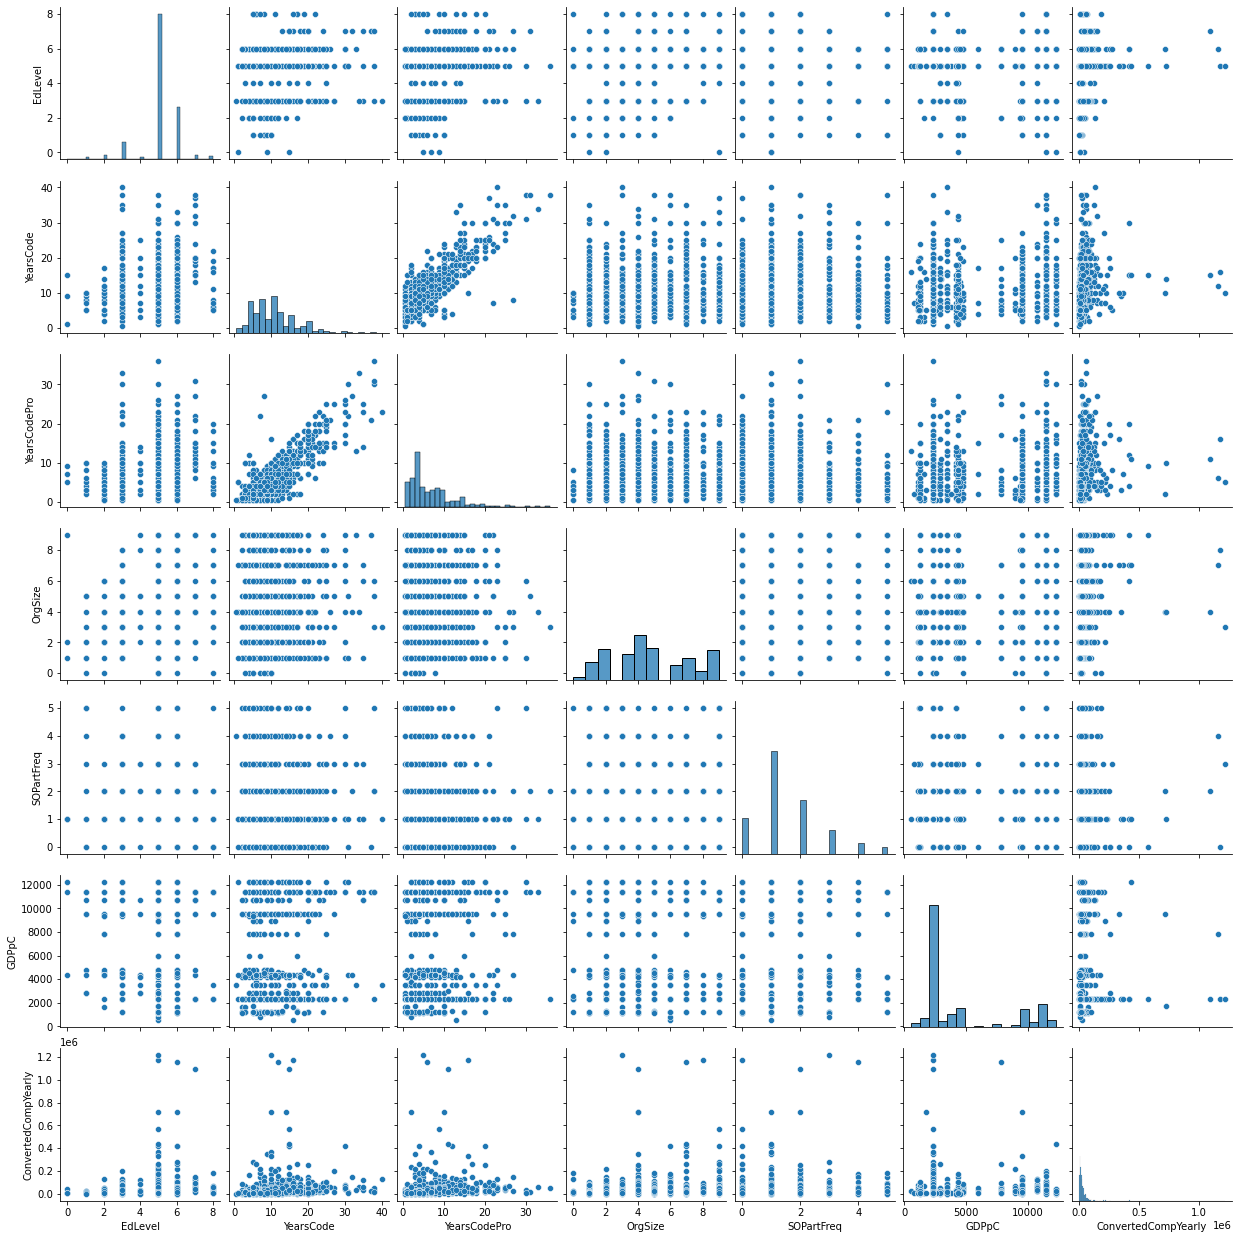

In [42]:
sns.pairplot(data=df_final[['EdLevel', 'YearsCode', 'YearsCodePro', 'OrgSize', 'SOPartFreq','GDPpC','ConvertedCompYearly']], diag_kind='hist')
plt.show()

Skewed features may need log transformation to improve model results. idk yet will initially try running models on not transformed data

In [43]:
df_final['YearsCodePro'].describe()

count    938.000000
mean       6.497868
std        5.344333
min        0.500000
25%        3.000000
50%        5.000000
75%        9.000000
max       36.000000
Name: YearsCodePro, dtype: float64

<AxesSubplot:ylabel='Frequency'>

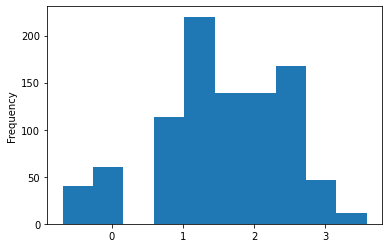

In [44]:
df_final['YearsCodePro'] = df_final['YearsCodePro'].copy().apply(np.log)
df_final['YearsCodePro'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

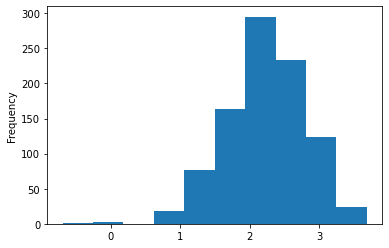

In [45]:
df_final['YearsCode'] = df_final['YearsCode'].copy().apply(np.log)
df_final['YearsCode'].plot(kind='hist')

In [46]:
# df_final['GDPpC'] = df_final['GDPpC'].copy().apply(np.log)
# df_final['GDPpC'].plot(kind='hist')


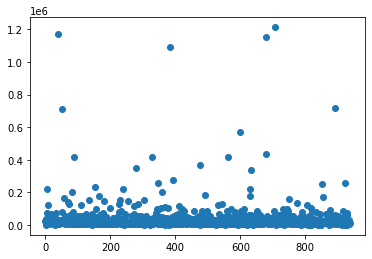

In [47]:
plt.scatter(
    df_final[['ConvertedCompYearly']].reset_index().drop(columns='index', axis=0).index,
    df_final[['ConvertedCompYearly']].reset_index().drop(columns='index', axis=0))

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


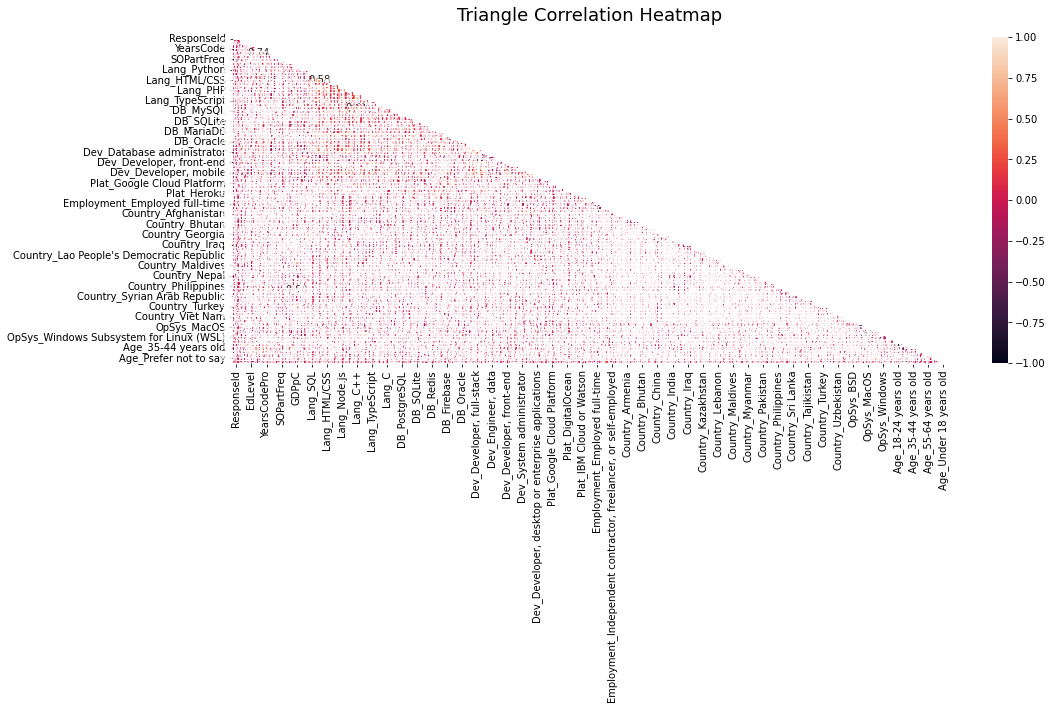

In [48]:
# code snippet for triangle correlation heatmap

def get_tri_corr_matrix(df_eda, figsize):
    
    plt.figure(figsize=figsize)
    # define the mask to set the values in the upper triangle to True

    mask = np.triu(np.ones_like(df_eda.corr(), dtype=np.bool))
    heatmap = sns.heatmap(df_eda.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

get_tri_corr_matrix(df_final, (16,6))

<AxesSubplot:>

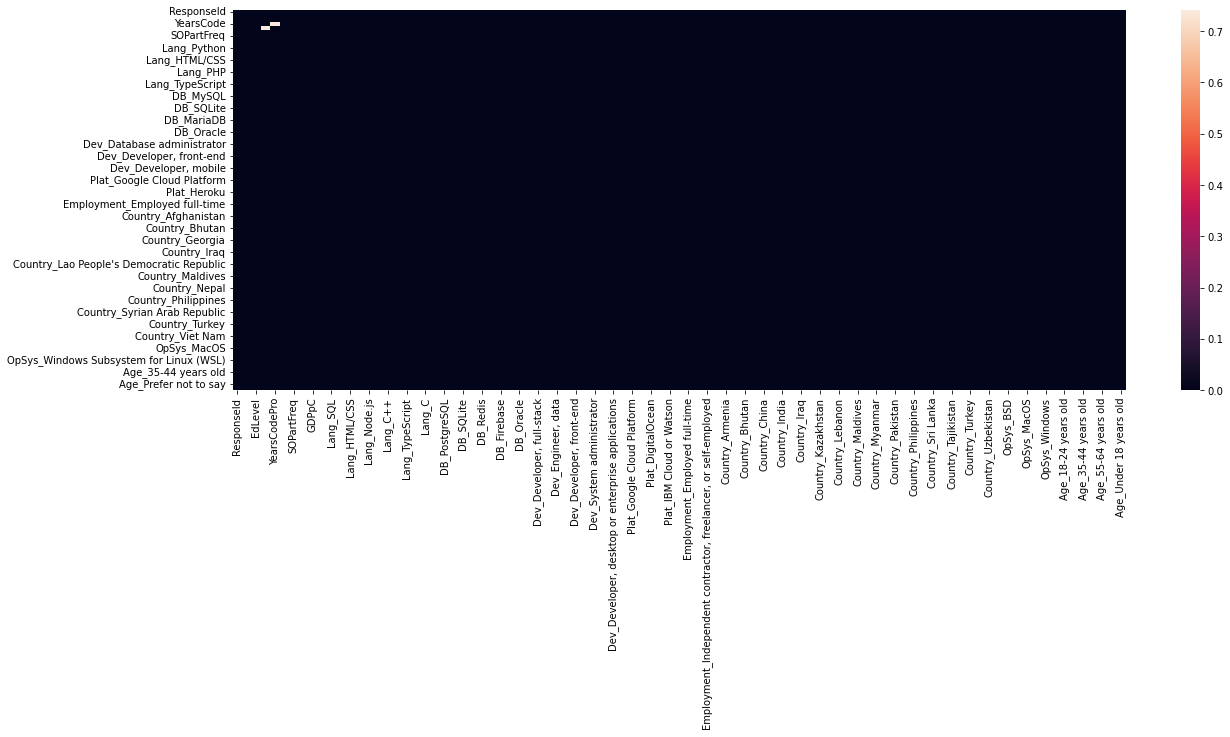

In [49]:
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(df_final.corr().applymap(lambda x: x if (x>=0.65) and (x!=1.0) else 0))

In [50]:
corr = df_final.corr().applymap(lambda x: x if (x>=0.60) and (x!=1.0) else np.nan)
i=0
for col in corr.columns:
    
    filtered = corr[[col]].dropna()
    if len(filtered)>0:
        print(col, filtered.index.tolist(), '\n------')
        display(filtered.sum().values)
    # if filtered.sum().values > 0:
    #     display(filtered)

YearsCode ['YearsCodePro'] 
------


array([0.74180975])

YearsCodePro ['YearsCode'] 
------


array([0.74180975])

GDPpC ['Country_Russian Federation'] 
------


array([0.61503787])

Lang_C++ ['Lang_C'] 
------


array([0.6142377])

Lang_C ['Lang_C++'] 
------


array([0.6142377])

Country_Russian Federation ['GDPpC'] 
------


array([0.61503787])

## Removing Outliers

### Manual Outlier detection (OFF if isoforest is ON)

In [51]:
# idx_outliers_y = df_final['ConvertedCompYearly'].sort_values(ascending=False).head(10).index.to_list()
# display(df_drop.loc[idx_outliers_y,:])
# df_final = df_final.drop(idx_outliers_y, axis=0)
# df_final

### Testing isolation forest for outlier detection

In [52]:
from sklearn.ensemble import IsolationForest
isoforest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.12 , max_features=1, random_state=11)
isoforest.fit(df_final[['ConvertedCompYearly']])

df_final['scores']=isoforest.decision_function(df_final[['ConvertedCompYearly']])
df_final['anomaly']=isoforest.predict(df_final[['ConvertedCompYearly']])

X does not have valid feature names, but IsolationForest was fitted with feature names


In [53]:
outliers_iso = df_final[df_final['anomaly']==-1].index
print('number of outliers: ', len(outliers_iso), '\n shape of df_final with outliers: ', df_final.shape)
df_final.drop(outliers_iso, axis=0, inplace=True)

number of outliers:  113 
 shape of df_final with outliers:  (938, 97)


In [54]:
df_final

ResponseId  MainBranch  EdLevel  YearsCode  YearsCodePro  OrgSize  \
index                                                                      
58             59           0        8   1.609438      1.098612        4   
148           149           0        6   0.693147      0.693147        1   
154           155           1        5   2.995732      1.945910        1   
168           169           1        3   1.386294      0.693147        1   
554           555           1        5   1.098612      0.000000        1   
...           ...         ...      ...        ...           ...      ...   
83046       83047           0        6   2.639057      2.397895        4   
83291       83292           1        5   1.609438      0.693147        9   
83294       83295           1        3   2.708050      2.564949        4   
83356       83357           1        5   2.397895      1.609438        1   
83431       83432           1        5   2.197225      1.386294        2   

       SOPartFreq  ConvertedCompYearly  GDPpC  Lang_Python  ...  \
index                                                       ...   
58              1                22644  11428            1  ...   
148             5                36000   4184            0  ...   
154             4                 2340   2338            1  ...   
168             4                14844   4746            1  ...   
554             3                11724   2338            0  ...   
...           ...                  ...    ...          ...  ...   
83046           4                13962   2338            0  ...   
83291           3                 5026   2338            1  ...   
83294           0                30192  11428            0  ...   
83356           0                 7020   4374            1  ...   
83431           2                11676   1254            1  ...   

       OpSys_Windows Subsystem for Linux (WSL)  Age_18-24 years old  \
index                                                                 
58                                           0                    0   
148                                          0                    0   
154                                          0                    0   
168                                          0                    1   
554                                          0                    1   
...                                        ...                  ...   
83046                                        0                    0   
83291                                        0                    1   
83294                                        0                    0   
83356                                        1                    0   
83431                                        0                    1   

       Age_25-34 years old  Age_35-44 years old  Age_45-54 years old  \
index                                                                  
58                       1                    0                    0   
148                      1                    0                    0   
154                      1                    0                    0   
168                      0                    0                    0   
554                      0                    0                    0   
...                    ...                  ...                  ...   
83046                    1                    0                    0   
83291                    0                    0                    0   
83294                    1                    0                    0   
83356                    1                    0                    0   
83431                    0                    0                    0   

       Age_55-64 years old  Age_Prefer not to say  Age_Under 18 years old  \
index                                                                       
58                       0                      0                       0   
148                      0                      0     

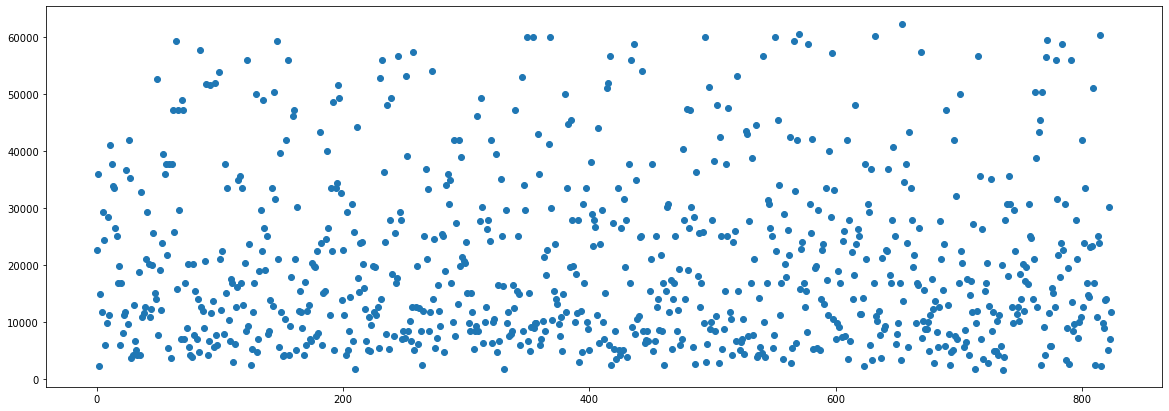

In [55]:
fig, ax = plt.subplots(figsize=(20,7))
plt.scatter(
    df_final[['ConvertedCompYearly']].reset_index().drop(columns='index', axis=0).index,
    df_final[['ConvertedCompYearly']].reset_index().drop(columns='index', axis=0))

## Adding/Removing features

In [56]:
def filter_lang(prefix):
    li = []
    for elem in df_final.columns:
        if prefix in elem:
            li.append(elem)
    return li

lang_cols = filter_lang('Lang_')
df_final['LCount'] = df_final[lang_cols].sum(axis=1)

dev_cols = filter_lang('Dev_')
df_final['DCount'] = df_final[dev_cols].sum(axis=1)

plat_cols = filter_lang('Plat_')
df_final['PCount'] = df_final[plat_cols].sum(axis=1)

db_cols = filter_lang('DB_')
df_final['DbCount'] = df_final[db_cols].sum(axis=1)


country_cols = filter_lang('Country_')
# country_cols = []

# removing language, devs, plat, db, country cols
# df_final = df_final.drop(
#     lang_cols+dev_cols+plat_cols+db_cols+country_cols, axis=1
# )


# removing platforms, database, country features only
# df_final = df_final.drop(
#     plat_cols+db_cols+country_cols, axis=1
# )

# removing platforms, database features only 
# df_final = df_final.drop(
#     plat_cols+db_cols, axis=1
# )

# removing lang, platforms, database features only 
# df_final = df_final.drop(
#     lang_cols+plat_cols+db_cols, axis=1
# )




df_final #best so far 12:24AM nov 27

ResponseId  MainBranch  EdLevel  YearsCode  YearsCodePro  OrgSize  \
index                                                                      
58             59           0        8   1.609438      1.098612        4   
148           149           0        6   0.693147      0.693147        1   
154           155           1        5   2.995732      1.945910        1   
168           169           1        3   1.386294      0.693147        1   
554           555           1        5   1.098612      0.000000        1   
...           ...         ...      ...        ...           ...      ...   
83046       83047           0        6   2.639057      2.397895        4   
83291       83292           1        5   1.609438      0.693147        9   
83294       83295           1        3   2.708050      2.564949        4   
83356       83357           1        5   2.397895      1.609438        1   
83431       83432           1        5   2.197225      1.386294        2   

       SOPartFreq  ConvertedCompYearly  GDPpC  Lang_Python  ...  \
index                                                       ...   
58              1                22644  11428            1  ...   
148             5                36000   4184            0  ...   
154             4                 2340   2338            1  ...   
168             4                14844   4746            1  ...   
554             3                11724   2338            0  ...   
...           ...                  ...    ...          ...  ...   
83046           4                13962   2338            0  ...   
83291           3                 5026   2338            1  ...   
83294           0                30192  11428            0  ...   
83356           0                 7020   4374            1  ...   
83431           2                11676   1254            1  ...   

       Age_45-54 years old  Age_55-64 years old  Age_Prefer not to say  \
index                                                                    
58                       0                    0                      0   
148                      0                    0                      0   
154                      0                    0                      0   
168                      0                    0                      0   
554                      0                    0                      0   
...                    ...                  ...                    ...   
83046                    0                    0                      0   
83291                    0                    0                      0   
83294                    0                    0                      0   
83356                    0                    0                      0   
83431                    0                    0                      0   

       Age_Under 18 years old    scores  anomaly  LCount  DCount  PCount  \
index                                                                      
58                          0  0.092767        1       5       2       1   
148                         0  0.065020        1       1       2       1   
154                         0  0.031921        1       6       5       1   
168                         0  0.098255        1       4       3       2   
554                         0  0.109989        1       8       6       2   
...                       ...       ...      ...     ...     ...     ...   
83046                       0  0.102653        1       4       5       2   
83291                       0  0.099744        1       5       2       1   
83294                       0  0.078415        1       2       2       1   
83356                       0  0.114452        1      11      10       6   
83431                       0  0.109523        1       9       4       1   

       DbCount  
index           
58           1  
148          1  
154          5  
168          1  
554          3  
...        ...  
83046        4  
83291        4  
83294        4  
83356  

In [57]:
# Dropping
# df_final.drop(['YearsCode'], axis=1, inplace=True)

**Adding Gender** (gender didnt do anything NOv 26 9:09)

In [58]:

# df_with_gender = pd.merge(df_devs, df_raw[['Gender']], how='left', left_index=True, right_index=True)
# df_with_gender['Gender'] = df_with_gender['Gender'].replace(np.nan, df_with_gender['Gender'].mode().values[0])
# df_with_gender['Gender'] = df_with_gender['Gender'].replace('Man;Or, in your own words:', 'Man')
# df_with_gender['Gender'] = df_with_gender['Gender'].replace('Or, in your own words:', 'Neither')
# df_with_gender['Gender'] = df_with_gender['Gender'].replace('Prefer not to say', 'Undisclosed')
# df_with_gender['Gender'] = df_with_gender['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Neither')


# df_final = pd.merge(df_final, pd.get_dummies(df_with_gender['Gender'], prefix='Gender'), how='left', left_index=True, right_index=True)
# # df_final


### ETHNICITY
# df_with_eth = pd.merge(df_devs, df_raw[['Ethnicity']], how='left', left_index=True, right_index=True)
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('White or of European descent', 'White')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('East Asian', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Southeast Asian;South Asian;East Asian;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Prefer not to say', 'Undisclosed')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Middle Eastern', 'Middle_Eastern')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('South Asian', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Or, in your own words:', 'Undisclosed')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('South Asian;Or, in your own words:', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Southeast Asian', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Southeast Asian;South Asian', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace(np.nan, df_with_eth['Ethnicity'].mode().values[0])
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace("I don't know", 'Not_Known')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('White or of European descent;Middle Eastern', 'Biracial')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace("I don't know;Middle Eastern", 'Middle_Eastern')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('White or of European descent;Multiracial', 'White')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Southeast Asian;East Asian', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Multiracial;Middle Eastern', 'Multi')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('East Asian;Or, in your own words:', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Southeast Asian;South Asian;Middle Eastern;East Asian', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Southeast Asian;South Asian;East Asian', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace("White or of European descent;I don't know", 'White')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace("I don't know;South Asian", 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Middle Eastern;Biracial', 'Biracial')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Hispanic or Latino/a/x', 'Latino')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Southeast Asian;South Asian;Or, in your own words:', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Middle Eastern;East Asian', 'Biracial')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace("I don't know;Or, in your own words:", 'Not_Known')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('South Asian;Middle Eastern', 'Biracial')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('White or of European descent;East Asian;Biracial', 'Biracial')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Multiracial', 'Multi')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Black or of African descent', 'African')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('South Asian;East Asian', 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace("I don't know;Southeast Asian", 'Asian')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('White or of European descent;Hispanic or Latino/a/x', 'Multi')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('White or of European descent;South Asian;Hispanic or Latino/a/x', 'Multi')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Middle Eastern;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)', 'Multi')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Southeast Asian;Middle Eastern;Biracial', 'Biracial')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('Biracial', 'Biracial')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace("White or of European descent;I don't know;Multiracial;Southeast Asian;South Asian;Hispanic or Latino/a/x;Middle Eastern;East Asian;Biracial;Black or of African descent;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)", 'Multi')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('White or of European descent;Multiracial;Middle Eastern', 'Multi')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace("White or of European descent;I don't know;Or, in your own words:", 'White')
# df_with_eth['Ethnicity'] = df_with_eth['Ethnicity'].replace('White or of European descent;Biracial;Black or of African descent', 'Multi')

# df_with_eth.Ethnicity.unique()
# df_final = pd.merge(df_final, pd.get_dummies(df_with_eth['Ethnicity'], prefix='Eth'), how='left', left_index=True, right_index=True)
# df_final

# ML

In [59]:
X = df_final[df_final.columns.difference(['ConvertedCompYearly', 'ResponseId', 'scores', 'anomaly'])]
y = df_final['ConvertedCompYearly']

In [60]:
X.columns

Index(['Age_18-24 years old', 'Age_25-34 years old', 'Age_35-44 years old',
       'Age_45-54 years old', 'Age_55-64 years old', 'Age_Prefer not to say',
       'Age_Under 18 years old', 'Country_Afghanistan', 'Country_Armenia',
       'Country_Azerbaijan', 'Country_Bhutan', 'Country_Cambodia',
       'Country_China', 'Country_Georgia', 'Country_India',
       'Country_Indonesia', 'Country_Iraq', 'Country_Jordan',
       'Country_Kazakhstan', 'Country_Lao People's Democratic Republic',
       'Country_Lebanon', 'Country_Malaysia', 'Country_Maldives',
       'Country_Mongolia', 'Country_Myanmar', 'Country_Nepal',
       'Country_Pakistan', 'Country_Palestine', 'Country_Philippines',
       'Country_Russian Federation', 'Country_Sri Lanka',
       'Country_Syrian Arab Republic', 'Country_Tajikistan',
       'Country_Thailand', 'Country_Turkey', 'Country_Turkmenistan',
       'Country_Uzbekistan', 'Country_Viet Nam', 'DB_Elasticsearch',
       'DB_Firebase', 'DB_MariaDB', 'DB_Microsoft SQ

## Logged y

since y is initially skewed

In [61]:

y = np.log(y)
y

index
58       10.027650
148      10.491274
154       7.757906
168       9.605351
554       9.369393
           ...    
83046     9.544095
83291     8.522380
83294    10.315332
83356     8.856518
83431     9.365291
Name: ConvertedCompYearly, Length: 825, dtype: float64

## Train-Test Split

In [62]:
(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X, y, 
                                           random_state=11, test_size=0.25)

## CV

In [63]:
# from sklearn.ensemble import RandomForestRegressor

# rf_test = RandomForestRegressor()
# rf_test.fit(X_trainval, y_trainval)
# rf_test_pred = rf_test.predict(X_holdout)
# mean_absolute_error(y_holdout, rf_test_pred)

### RF

In [64]:
def tune_RF(X, y):
    # from optuna.samplers import RandomSampler
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import cross_validate
    from sklearn.model_selection import KFold
    
    def optimize(trial):
        # Definition of space search
        n_estimators = trial.suggest_int('n_estimators', 10,500, step=10)
        max_depth = trial.suggest_int('max_depth', 2,100)
        # max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        max_features = trial.suggest_int('max_features', 2, X.shape[1])
        
        # Classifier definition
        model = RandomForestRegressor(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       max_features=max_features, random_state=11)
        scaler = MinMaxScaler()
        
        rf_pipe = Pipeline(steps = [['scale', scaler],['rf', model]]) #on
        
#         cr_val = cross_val_score(rf_pipe, X, y, cv=5, scoring=make_scorer(mean_absolute_error)) #on
        
        kf = KFold(n_splits=5)
        mae_list=[]
        for train_idx, val_idx in kf.split(X):
            X_train, y_train = X.iloc[train_idx,:], y.iloc[train_idx]
            X_val, y_val = X.iloc[val_idx,:], y.iloc[val_idx]
            
            X_train = scaler.fit_transform(X_train)
            X_val = scaler.transform(X_val)
            
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(np.exp(y_val), np.exp(y_pred))
            mae_list.append(mae)
        
    
    
        # return np.mean(cr_val) #on
        return np.mean(mae_list)
    
    study = optuna.create_study(direction='minimize')
    study.optimize(optimize, n_trials=50, n_jobs=4)
    return study, optimize

In [65]:
rf_study, rf_optimize = tune_RF(X_trainval, y_trainval)

[I 2021-11-29 20:29:38,355] A new study created in memory with name: no-name-94c01502-d0ed-415f-a277-43eb6612f337
`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
[I 2021-11-29 20:29:45,262] Trial 2 finished with value: 9715.882337560635 and parameters: {'n_estimators': 330, 'max_depth': 53, 'max_features': 2}. Best is trial 2 with value: 9715.882337560635.
[I 2021-11-29 20:29:47,557] Trial 0 finished with value: 8969.040529522568 and parameters: {'n_estimators': 150, 'max_depth': 14, 'max_features': 84}. Best is trial 0 with value: 8969.040529522568.
[I 2021-11-29 20:29:50,405] Trial 1 finished with value: 8870.235472290007 and parameters: {'n_estimators': 420, 'max_depth': 73, 'max_features': 13}. Best is trial 1 with value: 8870.235472290007.
[I 2021-11-29 20:29:50,515] Trial 3 finished with value: 8912.521342454544 and parameters: {'n_estimators': 430, 'max_depth': 20, 'max_features': 

In [66]:
rf_study.best_params

{'n_estimators': 500, 'max_depth': 97, 'max_features': 41}

In [67]:
rf_study.best_value

8800.095376218404

In [68]:
fig = optuna.visualization.plot_param_importances(rf_study)
fig.show()

#### Testing Optimal RF

In [69]:
rf = RandomForestRegressor(**rf_study.best_params, random_state=11)

def testing_optimal_model(model, n_trials):

    mae_list = []
    for n in tqdm_notebook(range(n_trials)):

        (X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                                              random_state=n, 
                                                              test_size=0.25)
        scaler = MinMaxScaler()

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred)) # on 
        mae_list.append(mae)
    return np.mean(mae_list)

testing_optimal_model(rf, 20)
# mean_absolute_error(np.exp(y_holdout), np.exp(rf_pred))
# without outliers using isoforest (world)
# 23858 using 0.12 contamination

# without outliers using isoforest (Asia)
# 11k using 0.12 contamination
# 11937.776566711611 including devtype
# 10792.095860289553 n_estimators 100
# 10867.821166744383 without years code
# 11530.901186962456 n_estimators 100 idk what happened

#### developing
# 9094.60503269718 keeping yearscode 
# 9133.497020564024 without yearscode
#9216.84715210654 without lang columns
# 9059.597967436777 keeping lang plat db cols # best one so far nov27 12:23 am

#######
# median_absolute_error(np.exp(y_holdout), np.exp(rf_pred))

  0%|          | 0/20 [00:00<?, ?it/s]

8812.276561589657

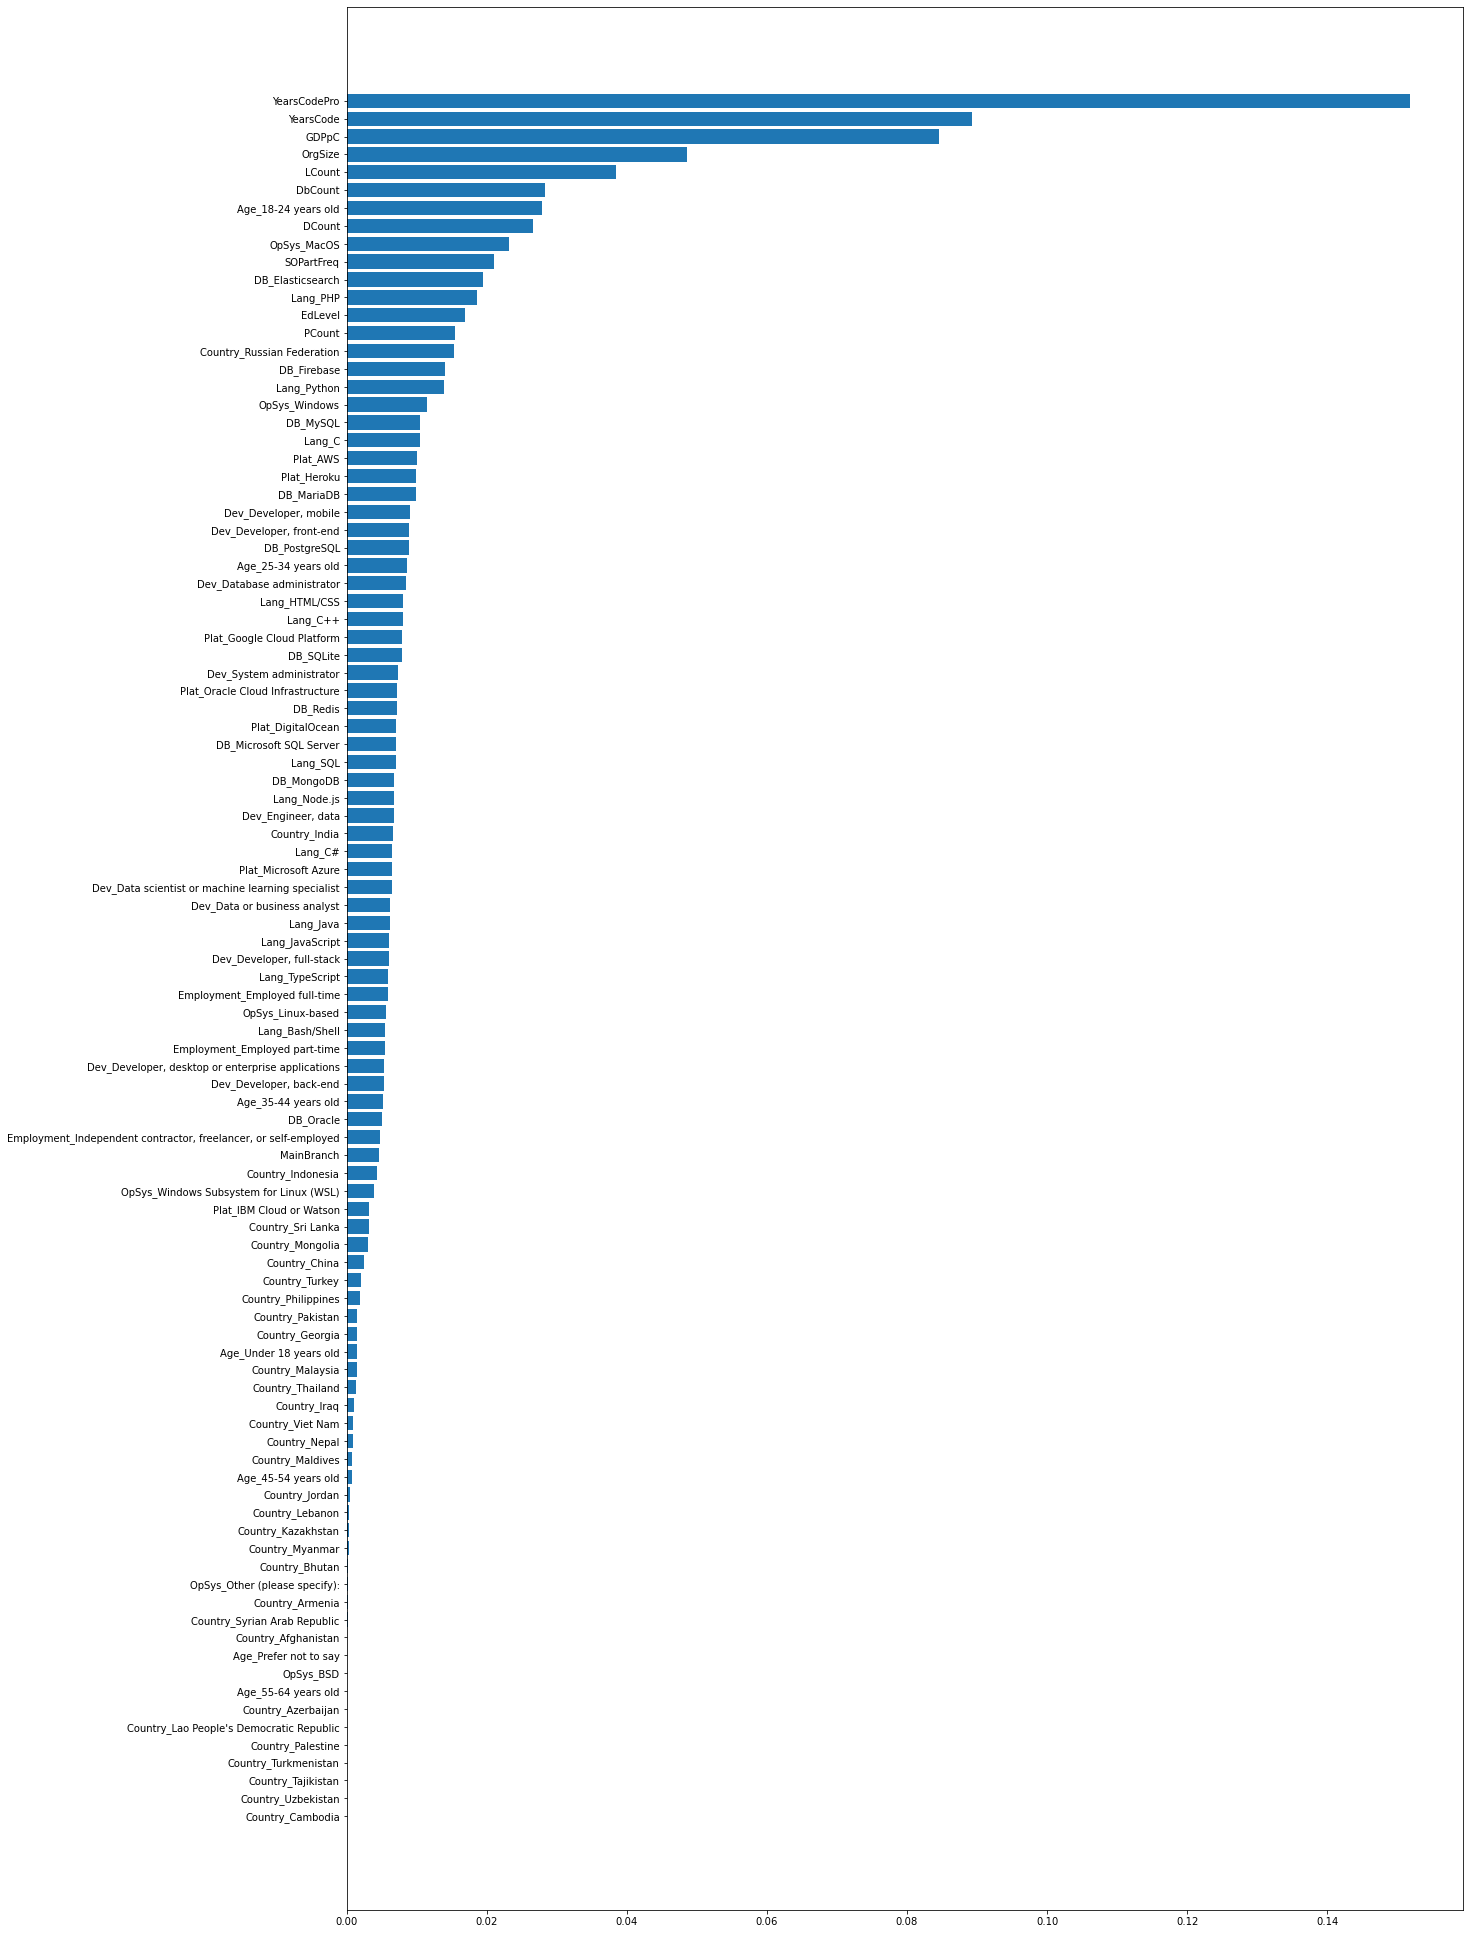

In [70]:
fig, ax = plt.subplots(figsize=(20,35))
plt.barh(X.columns[rf.feature_importances_.argsort()], rf.feature_importances_[rf.feature_importances_.argsort()])
# plt.autoscale()
plt.savefig('rf_feat_imp')

### GBM

In [71]:
def tune_GBM(X, y):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import cross_validate
    
    def optimize(trial):
        # Definition of space search
        n_estimators = trial.suggest_int('n_estimators', 10,800, step=10)
        max_depth = trial.suggest_int('max_depth', 2,15)
        # max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        max_features = trial.suggest_int('max_features', 2, X.shape[1])
        learning_rate = trial.suggest_float('learning_rate', 1e-6, 1e-1)
        
        # Classifier definition
        model = GradientBoostingRegressor(n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           max_features=max_features,
                                           learning_rate=learning_rate, random_state=11)

        scaler = MinMaxScaler()
        
        pipe = Pipeline(steps = [['scale', scaler],['gbm', model]]) #on
        
#         cr_val = cross_val_score(rf_pipe, X, y, cv=5, scoring=make_scorer(mean_absolute_error)) #on
        
        kf = KFold(n_splits=5)
        mae_list=[]
        for train_idx, val_idx in kf.split(X):
            X_train, y_train = X.iloc[train_idx,:], y.iloc[train_idx]
            X_val, y_val = X.iloc[val_idx,:], y.iloc[val_idx]
            
            X_train = scaler.fit_transform(X_train)
            X_val = scaler.transform(X_val)
            
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(np.exp(y_val), np.exp(y_pred))
            mae_list.append(mae)
        
    
    
        # return np.mean(cr_val) #on
        return np.mean(mae_list)
    
    study = optuna.create_study(direction='minimize')
    study.optimize(optimize, n_trials=70, n_jobs=4)
    return study, optimize

In [72]:
gbm_study, gbm_optimize = tune_GBM(X_trainval, y_trainval)

[I 2021-11-29 20:33:22,555] A new study created in memory with name: no-name-4399ba54-fcd5-4614-bfef-70be035dfdfe
C:\Users\JG\anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2021-11-29 20:33:24,039] Trial 2 finished with value: 8792.588292061822 and parameters: {'n_estimators': 210, 'max_depth': 4, 'max_features': 27, 'learning_rate': 0.026582532976311107}. Best is trial 2 with value: 8792.588292061822.
[I 2021-11-29 20:33:24,922] Trial 1 finished with value: 9088.023281758482 and parameters: {'n_estimators': 100, 'max_depth': 6, 'max_features': 82, 'learning_rate': 0.028095062736496333}. Best is trial 2 with value: 8792.588292061822.
[I 2021-11-29 20:33:27,616] Trial 4 finished with value: 9365.72400481198 and parameters: {'n_estimators': 140, 'max_depth': 8, 'max_features': 62, 'learning_rate': 0.0954666965934382

In [73]:
gbm_study.best_params

{'n_estimators': 370,
 'max_depth': 2,
 'max_features': 14,
 'learning_rate': 0.041207640917455005}

In [74]:
gbm_study.best_value

8560.576626535087

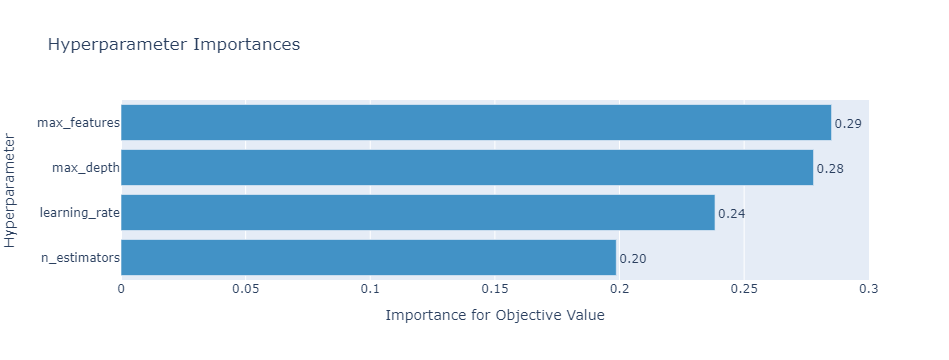

In [75]:
fig = optuna.visualization.plot_param_importances(gbm_study)
fig.show()

#### Testing Optimal GBM

In [76]:
gbm = GradientBoostingRegressor(**gbm_study.best_params, random_state=11)


testing_optimal_model(gbm, 20)

# 8454 with GDPpC

  0%|          | 0/20 [00:00<?, ?it/s]

8505.35477012315

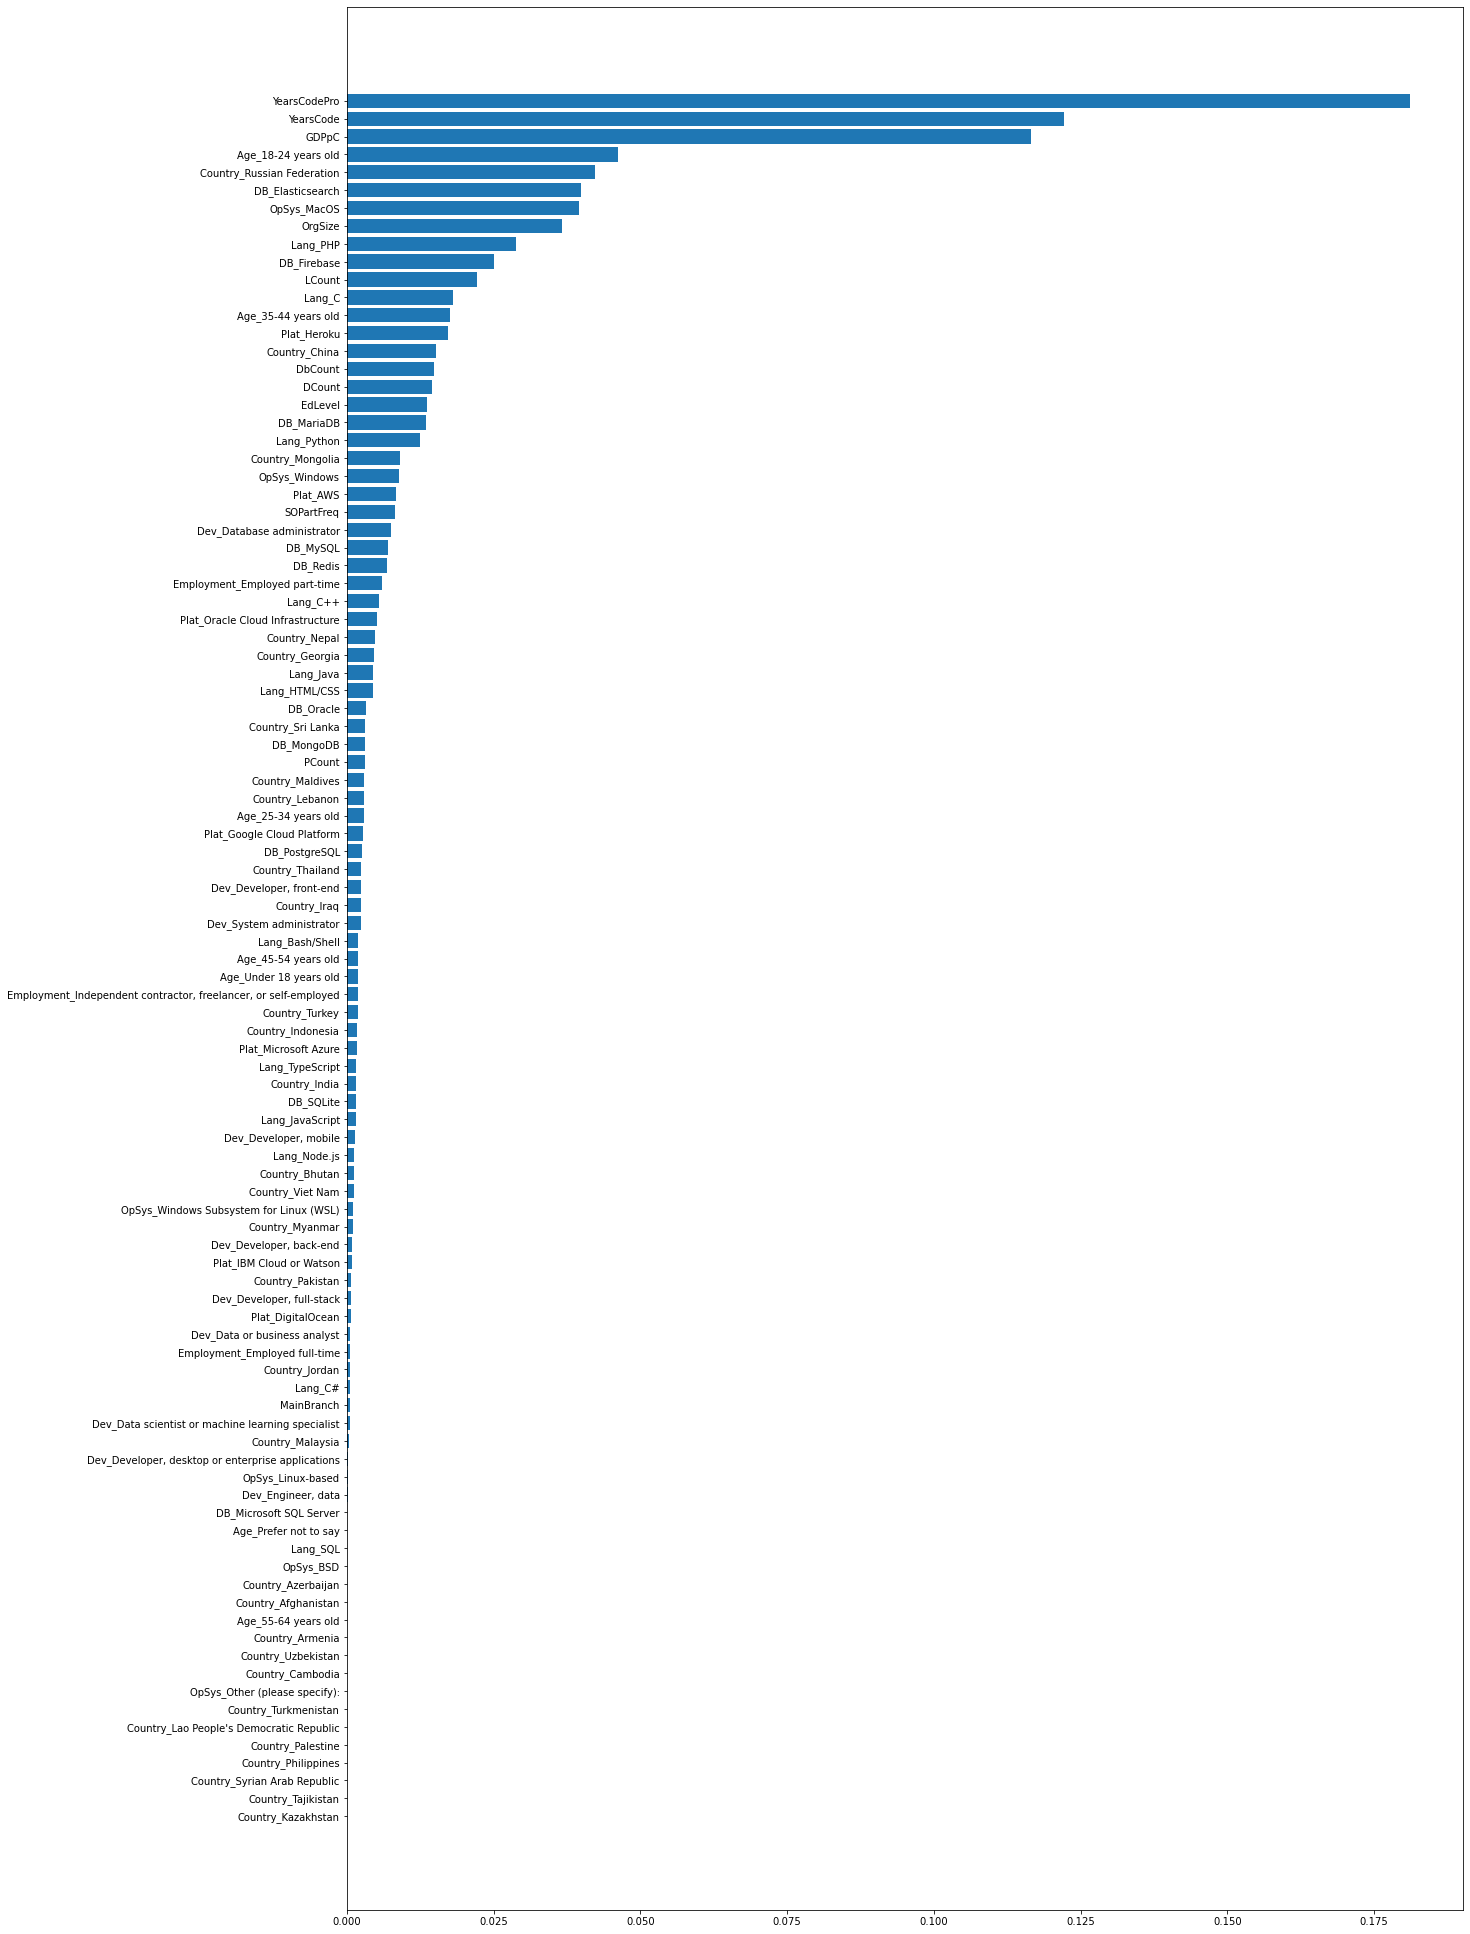

In [77]:
fig, ax = plt.subplots(figsize=(20,35))
plt.barh(X.columns[gbm.feature_importances_.argsort()], gbm.feature_importances_[gbm.feature_importances_.argsort()])
plt.autoscale()
# plt.savefig('rf_feat_imp')

### Lasso Regression

In [164]:
C_range = np.linspace(1e-5, 1e6, 100)
ss_scaler = StandardScaler(with_mean=False)
C_mae_list=[]
for c in tqdm_notebook(C_range):
    kf = KFold(n_splits=5)
    mae_list=[]
    for train_idx, val_idx in kf.split(X_trainval):
        X_train = X_trainval.iloc[train_idx,:]
        y_train = y_trainval.iloc[train_idx]
        
        X_val = X_trainval.iloc[val_idx,:]
        y_val = y_trainval.iloc[val_idx]
        
        X_train_scaled = ss_scaler.fit_transform(X_train)
        X_val_scaled = ss_scaler.transform(X_val)
        
        las_mod = Lasso(alpha=c, max_iter=1_000_000, random_state=11)
        las_mod.fit(X_train_scaled, y_train)
        las_pred = las_mod.predict(X_val_scaled)
        mae = mean_absolute_error(np.exp(y_val), np.exp(las_pred))
        mae_list.append(mae)
    C_mae = np.mean(mae_list)
    C_mae_list.append(C_mae)

  0%|          | 0/100 [00:00<?, ?it/s]

In [165]:
df_lasso = pd.DataFrame([C_mae_list, C_range], index=['avg MAE', 'C']).T
df_lasso.sort_values(by='avg MAE').head(3)

avg MAE              C
0    8803.978309       0.000010
72  11503.188106  727272.727275
71  11503.188106  717171.717175

#### Testing

In [166]:
optimal_lasso = Lasso(alpha = 0.00001, max_iter=1_000_000, random_state=11)
testing_optimal_model(optimal_lasso, 20)

  0%|          | 0/20 [00:00<?, ?it/s]

8851.351385560049

### MLP

In [167]:
def tune_MLP(X, y):

    from sklearn.model_selection import cross_validate
    
    def optimize(trial):
        # Definition of space search
        n_layers = trial.suggest_int('n_layers', 1, 4)
        layers = []
        for i in range(n_layers):
            layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))
        
        
        activations = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
        alpha = trial.suggest_float('alpha', 1e-4, 0.6)
        solver = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
        learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
        
        # Classifier definition
        model = MLPRegressor(hidden_layer_sizes=tuple(layers),
                             activation=activations,
                             alpha=alpha,
                             learning_rate=learning_rate,
                             solver=solver, 
                             random_state=11, 
                             max_iter=1_000_000)

        scaler = MinMaxScaler()
        
        
#         cr_val = cross_val_score(rf_pipe, X, y, cv=5, scoring=make_scorer(mean_absolute_error)) #on
        
        kf = KFold(n_splits=5)
        mae_list=[]
        for train_idx, val_idx in kf.split(X):
            X_train, y_train = X.iloc[train_idx,:], y.iloc[train_idx]
            X_val, y_val = X.iloc[val_idx,:], y.iloc[val_idx]
            
            X_train = scaler.fit_transform(X_train)
            X_val = scaler.transform(X_val)
            
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(np.exp(y_val), np.exp(y_pred))
            mae_list.append(mae)
        
    
    
        # return np.mean(cr_val) #on
        return np.mean(mae_list)
    
    study = optuna.create_study(direction='minimize')
    study.optimize(optimize, n_trials=100, n_jobs=4)
    return study, optimize

In [168]:
MLP_study, MLP_optimize = tune_MLP(X_trainval , y_trainval)

[I 2021-11-29 03:02:36,043] A new study created in memory with name: no-name-45c0aadb-63ea-40d0-b278-a5eedca41ccf
C:\Users\JG\anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2021-11-29 03:03:44,524] Trial 2 finished with value: 11340.066126326292 and parameters: {'n_layers': 2, 'n_units_0': 4, 'n_units_1': 59, 'activation': 'relu', 'alpha': 0.316906827159681, 'solver': 'lbfgs', 'learning_rate': 'adaptive'}. Best is trial 2 with value: 11340.066126326292.
[I 2021-11-29 03:04:17,631] Trial 4 finished with value: 8875.220187985315 and parameters: {'n_layers': 1, 'n_units_0': 17, 'activation': 'tanh', 'alpha': 0.11114911565008259, 'solver': 'sgd', 'learning_rate': 'adaptive'}. Best is trial 4 with value: 8875.220187985315.
[I 2021-11-29 03:04:28,105] Trial 1 finished with value: 9343.190647316454 and parameters: {'n_la

In [169]:
MLP_study.best_params

{'n_layers': 2,
 'n_units_0': 24,
 'n_units_1': 68,
 'activation': 'tanh',
 'alpha': 0.0942583805687255,
 'solver': 'sgd',
 'learning_rate': 'constant'}

In [170]:
tup=[]
study = MLP_study.best_params
for layer in range(study['n_layers']):
    tup.append(study[f'n_units_{layer}'])
    del study[f'n_units_{layer}']
del study['n_layers']
tup = tuple(tup)
tup

(24, 68)

In [171]:
study

{'activation': 'tanh',
 'alpha': 0.0942583805687255,
 'solver': 'sgd',
 'learning_rate': 'constant'}

#### Testing

In [172]:
mlp = MLPRegressor(hidden_layer_sizes=tup, **study, random_state=11, max_iter=1_000_000)
testing_optimal_model(mlp, 20)

  0%|          | 0/20 [00:00<?, ?it/s]

8698.546017154305